In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn import model_selection

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

# Data loading and pretreatment

In [3]:
taxi_data = pd.read_csv("taxi_pretreatment.csv")

In [4]:
taxi_data.head()

,depart_nom,depart_latitude,depart_longitude,depart_agglomeration,arrive_latitude,arrive_longitude,arrive_nom,arrive_agglomeration,distance,virages,embouteillage,prix
0,Centre des handicapes,3.863966,11.490792,2,3.876103,11.497105,mokolo-marché,5,2.300,7,5,150
1,Centre des handicapes,3.863967,11.490793,2,3.864167,11.496965,Total Melen,4,7.500,3,3,100
2,Centre des handicapes,3.863968,11.490794,2,3.862409,11.504112,Carefour EMIA,1,1.614,7,3,350
3,Centre des handicapes,3.863969,11.490795,2,3.892244,11.511425,Bastos(carrefour),2,5.297,14,3,350
4,Centre des handicapes,3.863970,11.490796,2,3.876147,11.489672,Cité verte,2,2.300,10,1,150


In [5]:
data = taxi_data.loc[:, ['distance', 'virages', 'prix']]
data.dropna(inplace=True)
print(data.shape)

(2258, 3)


In [6]:
data = data.astype(np.float32) 
data.ftypes

distance    float32:dense
virages     float32:dense
prix        float32:dense
dtype: object

In [7]:
data = data[["distance", "virages", "prix"]]
data_array = data.as_matrix() # to_records(index=False)

X, y = data_array[:, [0,1]], data_array[:, 2]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)
m, n = X_train.shape
u, v = X_test.shape
print(X_train.shape)
print(X_test.shape)

X_train_bias = np.c_[X_train, np.float32(np.ones((m, 1)))]
X_test_bias = np.c_[X_test, np.ones((u, 1))]

(1806, 2)
(452, 2)


# TF init

In [8]:
tf.reset_default_graph()

In [9]:
X_data = tf.placeholder(shape=[None, n+1], dtype=np.float32, name="X")
y_data = tf.placeholder(shape=[None, 1], dtype=np.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")

y_pred = tf.matmul(X_data, theta, name="predictions")
error = y_pred - y_data
mse = tf.reduce_mean(tf.square(error), name="mse")

# Mini-batch processing

In [100]:
learning_rate = 0.002

optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate, momentum=0.89)
training_op = optimizer.minimize(mse)

In [101]:
n_epochs = 100
batch_size = 400
n_batches = int(np.ceil(m / batch_size))

In [102]:
def fetch_batch(epoch, batch_index, batch_size):
    np.random.seed(epoch * n_batches + batch_index)
    indices = np.random.randint(m, size=batch_size)
    X_batch = X_train_bias[indices]
    y_batch = y_train.reshape(-1, 1)[indices]
    
    return X_batch, y_batch

In [103]:
# mini-batch gradient descent

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    losses = pd.DataFrame([]);
    for epoch in range(n_epochs):
        for batch in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch, batch_size)
            sess.run(training_op, feed_dict={X_data: X_batch, y_data: y_batch})
            
            print("MSE =", mse.eval(feed_dict={X_data: X_batch, y_data: y_batch}))
            loss = sess.run(mse, feed_dict={X_data: X_batch, y_data: y_batch})
            losses = losses.append({ "loss": loss, "step": int(epoch*n_batches + batch) }, ignore_index=True)
        print()
    best_theta = theta.eval()

print("Best theta:")
print(best_theta)

MSE = 24030.9
MSE = 104610.0
MSE = 72615.0
MSE = 17470.7
MSE = 90693.6

MSE = 45395.9
MSE = 28294.9
MSE = 74282.5
MSE = 21184.9
MSE = 31311.3

MSE = 47962.9
MSE = 16183.7
MSE = 32844.2
MSE = 29206.4
MSE = 15482.9

MSE = 27481.7
MSE = 20713.5
MSE = 11778.3
MSE = 24340.2
MSE = 17334.1

MSE = 16296.5
MSE = 20928.2
MSE = 12039.0
MSE = 17277.0
MSE = 17984.4

MSE = 15346.1
MSE = 16820.3
MSE = 16668.8
MSE = 14199.2
MSE = 17641.7

MSE = 15444.8
MSE = 14021.6
MSE = 16576.6
MSE = 13529.0
MSE = 13941.4

MSE = 16539.7
MSE = 13907.8
MSE = 16058.8
MSE = 14178.4
MSE = 14786.6

MSE = 17115.5
MSE = 14269.5
MSE = 15669.8
MSE = 14025.9
MSE = 14291.3

MSE = 11964.3
MSE = 13921.9
MSE = 15260.0
MSE = 16898.6
MSE = 14578.2

MSE = 14248.1
MSE = 13410.2
MSE = 15036.6
MSE = 11431.5
MSE = 14979.5

MSE = 15330.1
MSE = 12827.9
MSE = 14087.1
MSE = 13811.5
MSE = 12460.5

MSE = 13253.3
MSE = 13786.7
MSE = 13041.4
MSE = 13146.6
MSE = 12782.9

MSE = 13186.5
MSE = 15663.9
MSE = 13097.2
MSE = 12481.6
MSE = 13614.0

MSE =

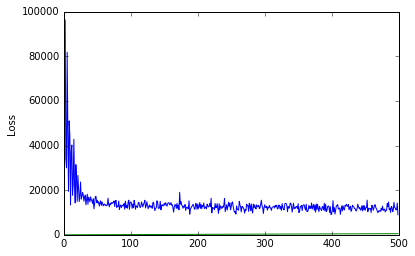

In [79]:
# Display the losses

plt.plot(losses)
plt.ylabel('Loss')
plt.show()

# Batch processing

In [33]:
n_epochs = 300

In [50]:
learning_rate = 0.001

optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate, momentum=0.89)
training_op = optimizer.minimize(mse)

In [51]:
epoch = 0
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    losses = [];
    pred_loss = 0;
    
    # Loop until it converges
    while True:
        sess.run(training_op, feed_dict={X_data: X_train_bias, y_data: y_train})
        
        print("MSE =", mse.eval(feed_dict={X_data: X_train_bias, y_data: y_train}))
        loss = sess.run(mse, feed_dict={X_data: X_train_bias, y_data: y_train})
        losses.append(loss)
        epoch = epoch + 1
        
        print("Loss = ", loss, " - Pred = ", pred_loss)
        
        if np.abs(pred_loss - loss) < 0.01 :
            break
        else: 
            pred_loss = loss;
    best_theta = theta.eval()

print("Best theta:")
print(best_theta)
print("Epochs : ", epoch)

MSE = 39468.6
Loss =  39468.6  - Pred =  0
MSE = 26201.8
Loss =  26201.8  - Pred =  39468.6
MSE = 74145.7
Loss =  74145.7  - Pred =  26201.8
MSE = 77883.4
Loss =  77883.4  - Pred =  74145.7
MSE = 32015.5
Loss =  32015.5  - Pred =  77883.4
MSE = 19819.0
Loss =  19819.0  - Pred =  32015.5
MSE = 49028.6
Loss =  49028.6  - Pred =  19819.0
MSE = 53991.5
Loss =  53991.5  - Pred =  49028.6
MSE = 25832.7
Loss =  25832.7  - Pred =  53991.5
MSE = 16153.1
Loss =  16153.1  - Pred =  25832.7
MSE = 34081.1
Loss =  34081.1  - Pred =  16153.1
MSE = 39068.3
Loss =  39068.3  - Pred =  34081.1
MSE = 22139.1
Loss =  22139.1  - Pred =  39068.3
MSE = 14975.3
Loss =  14975.3  - Pred =  22139.1
MSE = 25939.2
Loss =  25939.2  - Pred =  14975.3
MSE = 30222.2
Loss =  30222.2  - Pred =  25939.2
MSE = 20114.9
Loss =  20114.9  - Pred =  30222.2
MSE = 14899.4
Loss =  14899.4  - Pred =  20114.9
MSE = 21442.5
Loss =  21442.5  - Pred =  14899.4
MSE = 24723.5
Loss =  24723.5  - Pred =  21442.5
MSE = 18654.1
Loss =  1865

MSE = 12578.7
Loss =  12578.7  - Pred =  12583.2
MSE = 12574.2
Loss =  12574.2  - Pred =  12578.7
MSE = 12569.8
Loss =  12569.8  - Pred =  12574.2
MSE = 12565.3
Loss =  12565.3  - Pred =  12569.8
MSE = 12560.9
Loss =  12560.9  - Pred =  12565.3
MSE = 12556.5
Loss =  12556.5  - Pred =  12560.9
MSE = 12552.1
Loss =  12552.1  - Pred =  12556.5
MSE = 12547.8
Loss =  12547.8  - Pred =  12552.1
MSE = 12543.4
Loss =  12543.4  - Pred =  12547.8
MSE = 12539.1
Loss =  12539.1  - Pred =  12543.4
MSE = 12534.9
Loss =  12534.9  - Pred =  12539.1
MSE = 12530.6
Loss =  12530.6  - Pred =  12534.9
MSE = 12526.3
Loss =  12526.3  - Pred =  12530.6
MSE = 12522.1
Loss =  12522.1  - Pred =  12526.3
MSE = 12517.9
Loss =  12517.9  - Pred =  12522.1
MSE = 12513.7
Loss =  12513.7  - Pred =  12517.9
MSE = 12509.6
Loss =  12509.6  - Pred =  12513.7
MSE = 12505.4
Loss =  12505.4  - Pred =  12509.6
MSE = 12501.3
Loss =  12501.3  - Pred =  12505.4
MSE = 12497.2
Loss =  12497.2  - Pred =  12501.3
MSE = 12493.1
Loss =

MSE = 11890.9
Loss =  11890.9  - Pred =  11891.9
MSE = 11889.8
Loss =  11889.8  - Pred =  11890.9
MSE = 11888.7
Loss =  11888.7  - Pred =  11889.8
MSE = 11887.6
Loss =  11887.6  - Pred =  11888.7
MSE = 11886.6
Loss =  11886.6  - Pred =  11887.6
MSE = 11885.5
Loss =  11885.5  - Pred =  11886.6
MSE = 11884.5
Loss =  11884.5  - Pred =  11885.5
MSE = 11883.4
Loss =  11883.4  - Pred =  11884.5
MSE = 11882.4
Loss =  11882.4  - Pred =  11883.4
MSE = 11881.3
Loss =  11881.3  - Pred =  11882.4
MSE = 11880.3
Loss =  11880.3  - Pred =  11881.3
MSE = 11879.3
Loss =  11879.3  - Pred =  11880.3
MSE = 11878.2
Loss =  11878.2  - Pred =  11879.3
MSE = 11877.2
Loss =  11877.2  - Pred =  11878.2
MSE = 11876.2
Loss =  11876.2  - Pred =  11877.2
MSE = 11875.2
Loss =  11875.2  - Pred =  11876.2
MSE = 11874.2
Loss =  11874.2  - Pred =  11875.2
MSE = 11873.2
Loss =  11873.2  - Pred =  11874.2
MSE = 11872.2
Loss =  11872.2  - Pred =  11873.2
MSE = 11871.2
Loss =  11871.2  - Pred =  11872.2
MSE = 11870.2
Loss =

Loss =  11726.0  - Pred =  11726.3
MSE = 11725.8
Loss =  11725.8  - Pred =  11726.0
MSE = 11725.5
Loss =  11725.5  - Pred =  11725.8
MSE = 11725.2
Loss =  11725.2  - Pred =  11725.5
MSE = 11725.0
Loss =  11725.0  - Pred =  11725.2
MSE = 11724.7
Loss =  11724.7  - Pred =  11725.0
MSE = 11724.5
Loss =  11724.5  - Pred =  11724.7
MSE = 11724.2
Loss =  11724.2  - Pred =  11724.5
MSE = 11724.0
Loss =  11724.0  - Pred =  11724.2
MSE = 11723.7
Loss =  11723.7  - Pred =  11724.0
MSE = 11723.4
Loss =  11723.4  - Pred =  11723.7
MSE = 11723.2
Loss =  11723.2  - Pred =  11723.4
MSE = 11722.9
Loss =  11722.9  - Pred =  11723.2
MSE = 11722.7
Loss =  11722.7  - Pred =  11722.9
MSE = 11722.5
Loss =  11722.5  - Pred =  11722.7
MSE = 11722.2
Loss =  11722.2  - Pred =  11722.5
MSE = 11722.0
Loss =  11722.0  - Pred =  11722.2
MSE = 11721.7
Loss =  11721.7  - Pred =  11722.0
MSE = 11721.5
Loss =  11721.5  - Pred =  11721.7
MSE = 11721.2
Loss =  11721.2  - Pred =  11721.5
MSE = 11721.0
Loss =  11721.0  - P

Loss =  11686.2  - Pred =  11686.3
MSE = 11686.1
Loss =  11686.1  - Pred =  11686.2
MSE = 11686.1
Loss =  11686.1  - Pred =  11686.1
MSE = 11686.0
Loss =  11686.0  - Pred =  11686.1
MSE = 11685.9
Loss =  11685.9  - Pred =  11686.0
MSE = 11685.9
Loss =  11685.9  - Pred =  11685.9
MSE = 11685.8
Loss =  11685.8  - Pred =  11685.9
MSE = 11685.7
Loss =  11685.7  - Pred =  11685.8
MSE = 11685.7
Loss =  11685.7  - Pred =  11685.7
MSE = 11685.6
Loss =  11685.6  - Pred =  11685.7
MSE = 11685.6
Loss =  11685.6  - Pred =  11685.6
MSE = 11685.5
Loss =  11685.5  - Pred =  11685.6
MSE = 11685.4
Loss =  11685.4  - Pred =  11685.5
MSE = 11685.4
Loss =  11685.4  - Pred =  11685.4
MSE = 11685.3
Loss =  11685.3  - Pred =  11685.4
MSE = 11685.2
Loss =  11685.2  - Pred =  11685.3
MSE = 11685.2
Loss =  11685.2  - Pred =  11685.2
MSE = 11685.1
Loss =  11685.1  - Pred =  11685.2
MSE = 11685.1
Loss =  11685.1  - Pred =  11685.1
MSE = 11685.0
Loss =  11685.0  - Pred =  11685.1
MSE = 11684.9
Loss =  11684.9  - P

MSE = 11676.0
Loss =  11676.0  - Pred =  11676.0
MSE = 11676.0
Loss =  11676.0  - Pred =  11676.0
MSE = 11676.0
Loss =  11676.0  - Pred =  11676.0
MSE = 11676.0
Loss =  11676.0  - Pred =  11676.0
MSE = 11676.0
Loss =  11676.0  - Pred =  11676.0
MSE = 11675.9
Loss =  11675.9  - Pred =  11676.0
MSE = 11675.9
Loss =  11675.9  - Pred =  11675.9
MSE = 11675.9
Loss =  11675.9  - Pred =  11675.9
MSE = 11675.9
Loss =  11675.9  - Pred =  11675.9
MSE = 11675.9
Loss =  11675.9  - Pred =  11675.9
MSE = 11675.9
Loss =  11675.9  - Pred =  11675.9
MSE = 11675.8
Loss =  11675.8  - Pred =  11675.9
MSE = 11675.8
Loss =  11675.8  - Pred =  11675.8
MSE = 11675.8
Loss =  11675.8  - Pred =  11675.8
MSE = 11675.8
Loss =  11675.8  - Pred =  11675.8
MSE = 11675.8
Loss =  11675.8  - Pred =  11675.8
MSE = 11675.8
Loss =  11675.8  - Pred =  11675.8
MSE = 11675.8
Loss =  11675.8  - Pred =  11675.8
MSE = 11675.7
Loss =  11675.7  - Pred =  11675.8
MSE = 11675.7
Loss =  11675.7  - Pred =  11675.7
MSE = 11675.7
Loss =

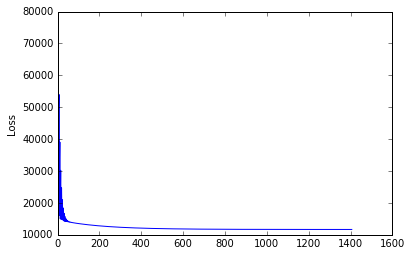

In [55]:
# Display the losses

plt.plot(range(epoch), losses)
plt.ylabel('Loss')
plt.show()